In [1]:
import site
import sys

sys.path.append('/mnt/home/agabrielpillai/.local/lib/python3.6/site-packages/')
site.addsitedir('/mnt/home/agabrielpillai/') 
site.addsitedir('/mnt/home/agabrielpillai/scripts/') 

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import h5py

import illustris_sam as ilsam

In [2]:
basePath = '/mnt/ceph/users/agabrielpillai/tng-sam/L75n1820TNG/outputs'

In [3]:
header = ilsam.groupcat.load_header(basePath, [0, 0, 0])

In [4]:
header['Haloprop']['N_total_z'][99], header['Haloprop']['N_this_z'][99]

(1346899, 9513)

In [5]:
header['Galprop']['N_total_z'][99], header['Galprop']['N_this_z'][99]

(6413642, 34192)

In [6]:
test_halo = ilsam.groupcat.load_snap_halos(basePath, 99, [[0, 0, 0], [0, 0, 1]], fields=['HalopropMvir', 'HalopropC_nfw'])

In [7]:
test_halo

{'HalopropMvir': array([0.894597, 1.81577 , 4.88043 , ..., 1.03779 , 1.20165 , 0.96398 ],
       dtype=float32),
 'HalopropC_nfw': array([27.5187, 25.6768, 24.6642, ..., 22.8581, 41.4391, 22.5919],
       dtype=float32),
 'HalopropRedshift': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)}

In [8]:
subvolume_list = []

for i in range(5):
    for j in range(5):
        for k in range(5):
            subvolume_list.append([i, j, k])

In [9]:
test_snapshot = ilsam.groupcat.load_snap_subhalos(basePath, 99, subvolume_list, fields=['GalpropMhalo', 'GalpropMstar', 'GalpropSatType'])

In [21]:
galprop = pd.DataFrame()
galprop['mhalo'] = test_snapshot['GalpropMhalo']
galprop['mstar'] = test_snapshot['GalpropMstar']
galprop['sat_type'] = test_snapshot['GalpropSatType']

galprop = galprop[galprop['sat_type'] == 0].reset_index(drop=True)
galprop = galprop[galprop['mhalo'] *1e9 > 1e10].reset_index(drop=True)

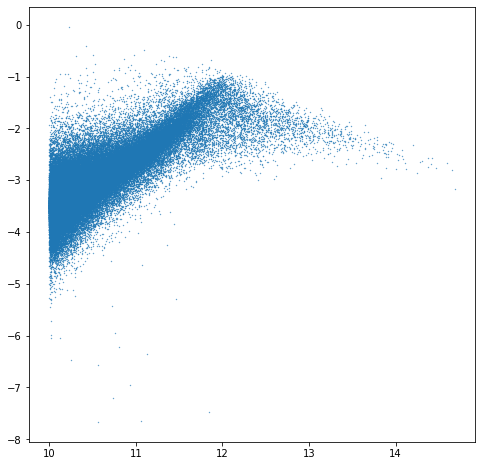

In [24]:
plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(np.log10(galprop['mhalo'] * 1e9), np.log10(galprop['mstar'] / galprop['mhalo']), s = 0.1)